In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from astropy.time import Time
import netCDF4

In [20]:
data=pd.read_csv('receivers.csv')

In [21]:
idx=np.array([0,6,9,14,23])
data=data.loc[idx]

In [22]:
data

,receiver,station_name,station_lat,station_lon
0,122662,PMJ11,42.693115,-70.528978
6,122653,PMJ17,42.694162,-70.448431
9,122655,PMJ7,42.702134,-70.495623
14,122668,PMJ2,42.710798,-70.489115
23,109306,PMJ24,42.685157,-70.481790


In [23]:
f=netCDF4.Dataset('http://fvcom.smast.umassd.edu:8080/thredds/dodsC/fvcom/hindcasts/30yr_gom3','r')

In [24]:
fvcom_lon=f.variables['lon'][:]
fvcom_lat=f.variables['lat'][:]
fvcom_tri=f.variables['nv'][:].T-1
fvcom_time=f.variables['time'][:]
fvcom_zeta=f.variables['zeta']

[-70.6, -70.4, 42.6, 42.75]

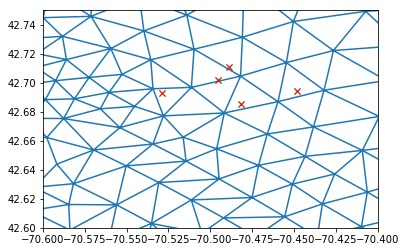

In [25]:
plt.triplot(fvcom_lon, fvcom_lat, fvcom_tri)
plt.plot(data.station_lon,data.station_lat,'x')
plt.plot(data.station_lon[idx],data.station_lat[idx],'rx')
plt.axis([-70.6, -70.4, 42.6, 42.75])

In [27]:
nnode=[];
for i in idx:
    dist=np.sqrt((fvcom_lon-data.station_lon[i])**2+(fvcom_lat-data.station_lat[i])**2)
    nnode.append(np.where(dist==dist.min())[0][0])
print(nnode)
data['nnode']=nnode

[36155, 34795, 35257, 35257, 35258]


In [1]:
time = np.arange(datetime(2015,7,1), datetime(2015,7,10), timedelta(hours=1)).astype(datetime)

NameError: name 'np' is not defined

In [28]:
data

,receiver,station_name,station_lat,station_lon,nnode
0,122662,PMJ11,42.693115,-70.528978,36155
6,122653,PMJ17,42.694162,-70.448431,34795
9,122655,PMJ7,42.702134,-70.495623,35257
14,122668,PMJ2,42.710798,-70.489115,35257
23,109306,PMJ24,42.685157,-70.481790,35258


In [ ]:
for index,row in data.iterrows():

    
    fvcom_time=f.variables['time'][:]
    fvcom_zeta=f.variables['zeta'][:,row['nnode']]


    
    
    t=Time(np.array(time).tolist(),format='mjd',scale='utc')
    s = pd.DataFrame(np.array([t.iso,time,elev]).T, columns =['Time','Modified Julian Day','Elevation'])
    s['Modified Julian Day']=time
    s['Elevation']=elev
    s.to_csv(row['station_name']+'.csv')
    
    plt.figure(figsize=(16,2))
    plt.plot(time,elev)
    plt.title('node: '+str(row['nnode'])+' ('+row['station_name']+')')
    plt.savefig(row['station_name']+'.png')
    plt.show()

In [ ]:
s['Modified Julian Day']=time

In [ ]:
s

In [ ]:
data1=pd.read_csv('receivers.csv')
plt.triplot(fvcom_lon, fvcom_lat, fvcom_tri)
plt.plot(data1.station_lon,data1.station_lat,'rx')
plt.plot(data.station_lon,data.station_lat,'ro')
plt.plot(fvcom_lon[np.array(data.nnode)],fvcom_lat[np.array(data.nnode)],'go')
plt.axis([-70.6, -70.4, 42.6, 42.75])
for station,xpt,ypt in zip(data.station_name.tolist(),data.station_lon.tolist(),data.station_lat.tolist()):
    plt.text(xpt,ypt,station,fontsize=14,color='red')

In [ ]:
fvcom_lon[np.array(data.nnode)].tolist()

In [ ]:
df=pd.DataFrame(np.array([data.station_name.tolist(),fvcom_lon[np.array(data.nnode)].tolist(),fvcom_lat[np.array(data.nnode)].tolist()]).T,columns =['Station','Node_lon','Node_lat'])

In [ ]:
df

In [ ]:
df.to_csv('node_coor.csv')